# Loan Defaulter Prediction:

## Import required packages:

In [1]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations and handling arrays
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For statistical data visualization based on Matplotlib

# Setting the default Seaborn style for plots
sns.set()

# Configuring Pandas display options
pd.set_option('display.max_columns', None)  # Show all columns when displaying DataFrames
pd.set_option('display.max_rows', 50)  # Limit the number of rows displayed to 50

# Importing MySQL connector for database interaction
import mysql.connector  # For connecting to and interacting with MySQL databases

# Suppressing warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')  # Ignore all warnings that might clutter the output

In [2]:
# Database connection parameters
host = 'localhost'  # The hostname of the MySQL server; 'localhost' indicates the server is on the same machine
database = 'project'  # The name of the database to connect to; in this case, it's 'project'
user = 'root'  # The username for authentication; 'root' is the default administrative user in MySQL
password = 'root'  # The password associated with the 'root' user; ensure this is kept secure

In [3]:
# Attempting to establish a connection to the MySQL database
try:
    # Establishing the connection using the previously defined parameters
    connection = mysql.connector.connect(
        host=host,  # Hostname of the MySQL server
        database=database,  # Name of the database to connect to
        user=user,  # Username for authentication
        password=password,  # Password for the specified user
        allow_local_infile=True  # Allow loading data from local files
    )
    
    # Checking if the connection was successful
    if connection.is_connected():
        print("Connected to MySQL database")  # Confirmation message for successful connection

# Handling any errors that occur during the connection attempt
except Error as e:
    print(f"Error: {e}")  # Print the error message if the connection fails

Connected to MySQL database


# Read the data:

In [4]:
query = "select * from lending_club_loan_two"
df = pd.read_sql(query, connection)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


# Exploratory Data Analysis (EDA):

In [5]:
# information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  float64       
 1   term                  396030 non-null  object        
 2   int_rate              396030 non-null  float64       
 3   installment           396030 non-null  float64       
 4   grade                 396030 non-null  object        
 5   sub_grade             396030 non-null  object        
 6   emp_title             396030 non-null  object        
 7   emp_length            396030 non-null  object        
 8   home_ownership        396030 non-null  object        
 9   annual_inc            396030 non-null  float64       
 10  verification_status   396030 non-null  object        
 11  issue_d               396030 non-null  datetime64[ns]
 12  loan_status           396030 non-null  object        
 13 

### Counting variables by Data type:

In [6]:
df.dtypes.value_counts()

object            14
float64           12
datetime64[ns]     1
Name: count, dtype: int64

In [7]:
## Statistical Summary of Numerical Variables of the data set
df.describe()

,loan_amnt,int_rate,installment,annual_inc,issue_d,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,396030.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,2014-02-02 15:57:58.045602560,17.379514,11.311153,0.178191,1.584454e+04,53.754260,25.414744,1.640873,0.121483
min,500.000000,5.320000,16.080000,0.000000e+00,2007-06-01 00:00:00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,2013-05-01 00:00:00,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,2014-04-01 00:00:00,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,2015-03-01 00:00:00,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,2016-12-01 00:00:00,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000
std,8357.441341,4.472157,250.727790,6.163762e+04,NaN,18.019092,5.137649,0.530671,2.059184e+04,24.484857,11.886991,2.111249,0.355962


# Observations:
- Higest loan amount is 40000
- Highest interest rate is 30.99%

# Counting missing values in dataset:¶

In [8]:
features_with_NA = [features for features in df.columns if df[features].isnull().sum() > 1]

print("Missing values:\n")

for feature in features_with_NA:
    print(f"{feature} = {round(df[feature].isna().sum()*100/len(df),2)} % \n")

Missing values:



# Analysis of target variable =

- Loan Status : Current status of the the loan.

In [9]:
# To get extact count we have used valuecounts method -
df["loan_status"].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

<Axes: ylabel='count'>

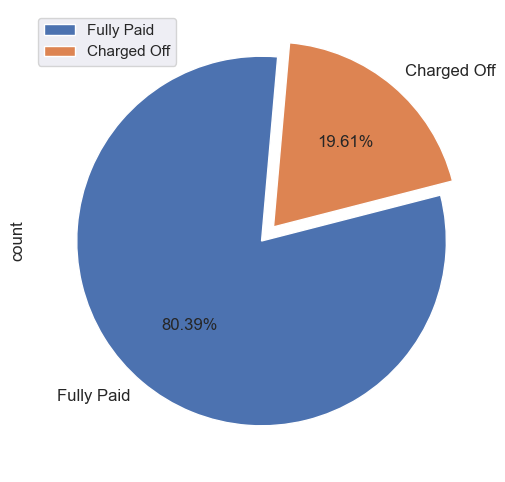

In [10]:
# pie chart
# with better visualization with value percentage in each categories we have used pie chart-

df['loan_status'].value_counts().plot(kind='pie',legend=True, startangle=85, fontsize=12, figsize=(14,6),autopct='%1.2f%%',explode= (0, 0.1))

# Obsevations:
- We have data for loan status in ratio of 80 to 20.
- Dataset is highly imbalanced.
- Dataset will be baised towards fully paid since we have more cases for fully paid category than charged off.

### Checking correlations =

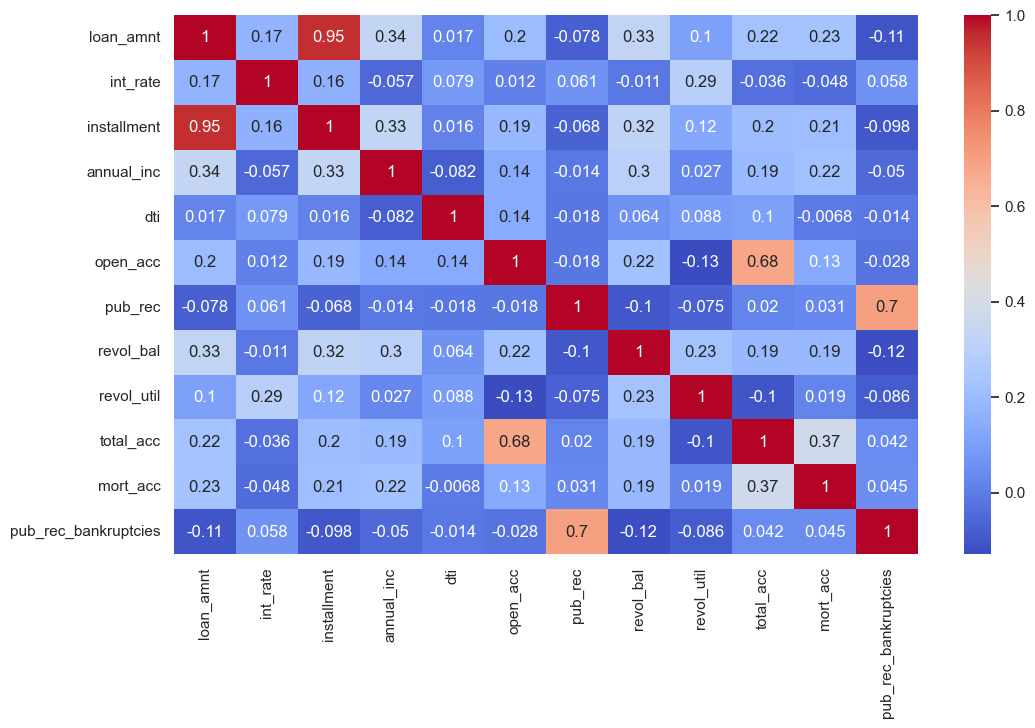

In [11]:
# correalation = df.corr()
# plt.figure(figsize=(12,7))
# sns.heatmap(corr, annot=True)
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')


plt.figure(figsize=(12, 7))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Observations:
- It has only plotted for numerical variables-
- There is strong correlation between installment and loan_amount.
- mort acc is +vely correlated with total acc, the correlation is not much high.
- pub_rec_bankruptcies is strongly correlated with pub_rec.
- total_acc is also correlated with open_acc
- also there is small correlation between annul_inc and installment

#### For better understanding we have created jointplot of loan amount and installment-

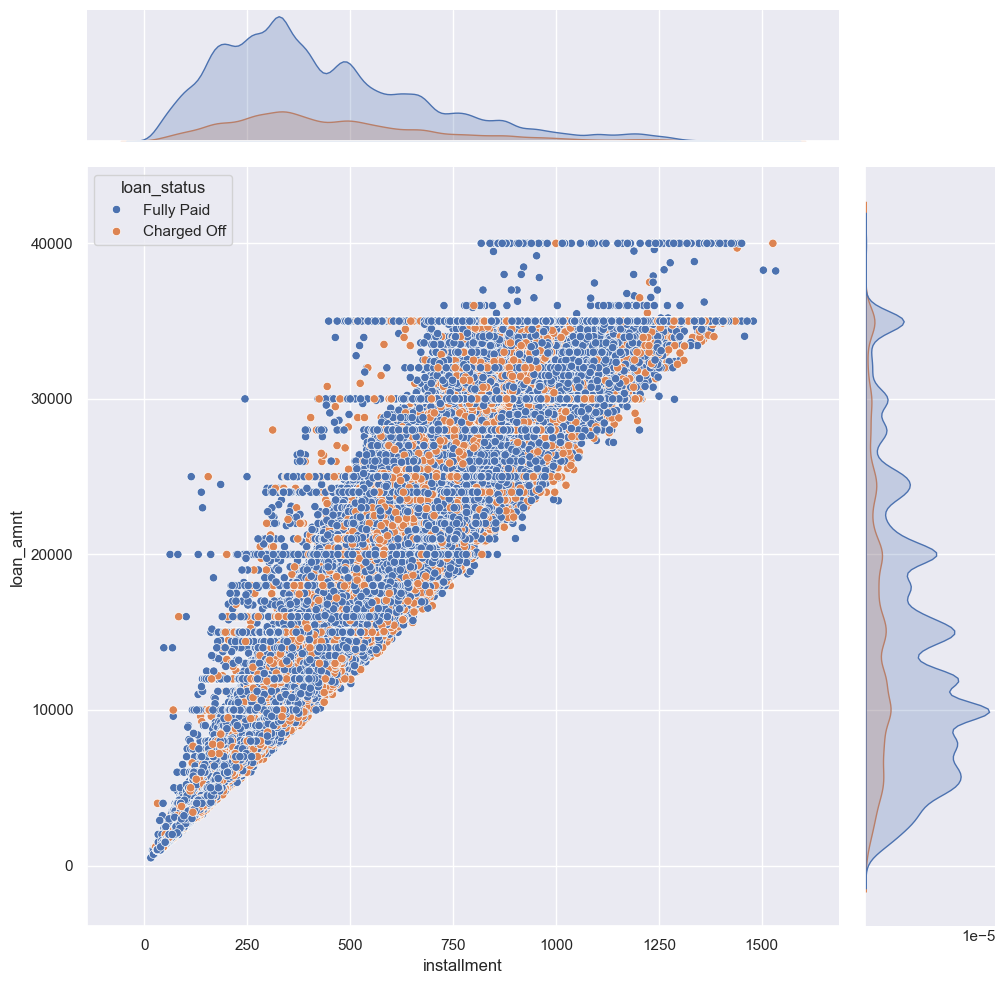

In [12]:
 sns.jointplot(x="installment", y="loan_amnt", data=df, hue='loan_status', height=10)

### Observations-
- Loan amount and installment has linear relationship.
- But Loan installment amount is different for same loan amount.
- It may be because loan installment is calculated using some kind of formula which take loan amount, time period and other   factors into consideraion.

# visualising distrubution of loan amount-

<Axes: xlabel='loan_amnt', ylabel='Count'>

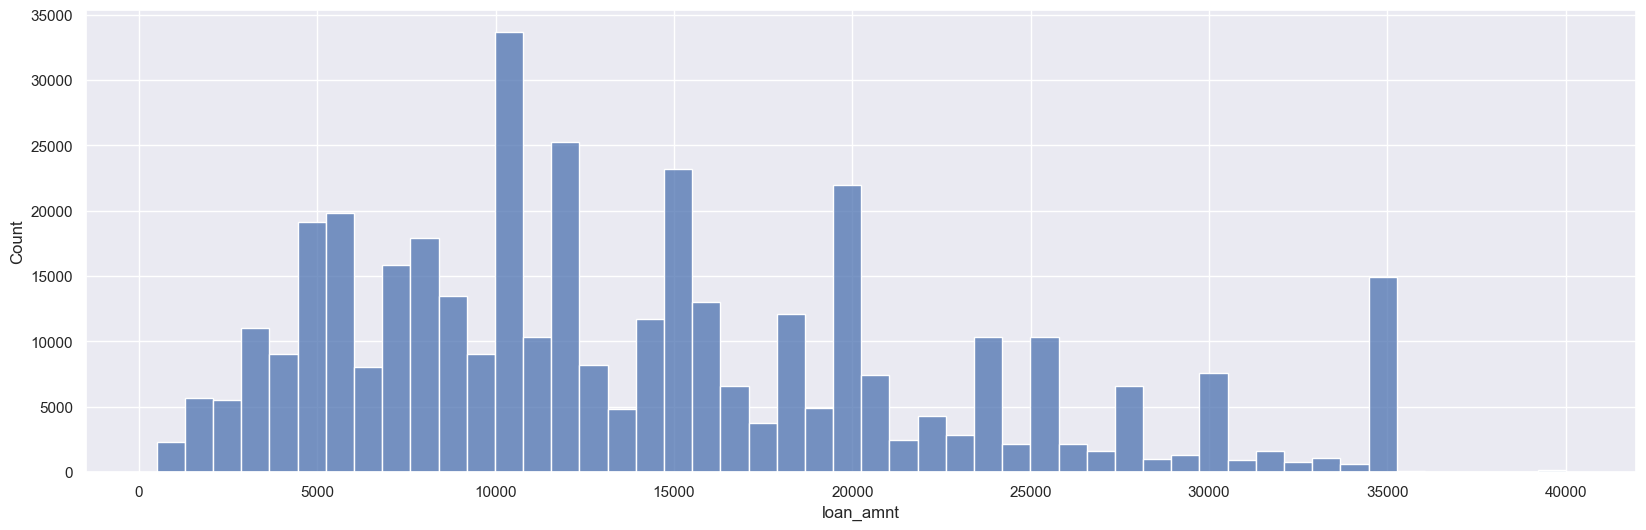

In [13]:
# continious variable - we will use histogram-

plt.figure(figsize=(20,6))
sns.histplot(df['loan_amnt'], bins=50)

# visualising distrubution of installments 

<Axes: xlabel='installment', ylabel='Count'>

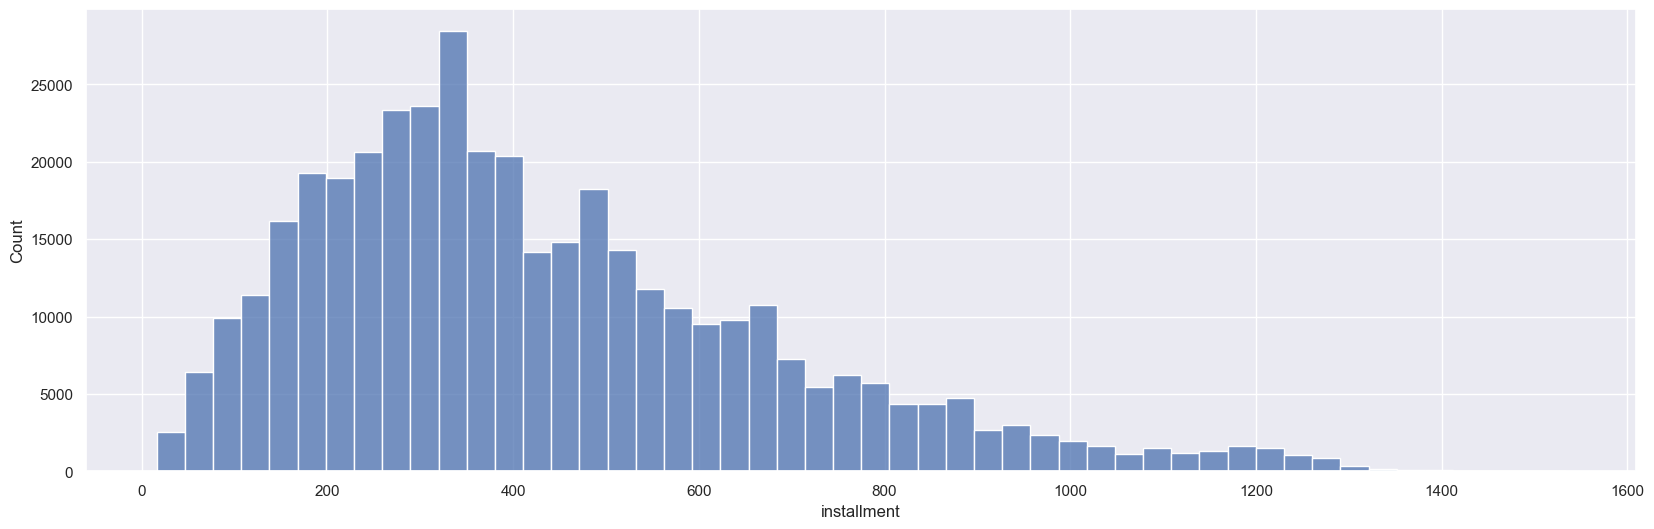

In [14]:
plt.figure(figsize=(20,6))
sns.histplot(df['installment'],kde=False, bins=50)

# Observations:
- loan amount and installment have Right skwied distrubution
- because it has long right tail
  (Positively skewed distrubution)

### To check how loan amount affects the target variable we have used boxplot-

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

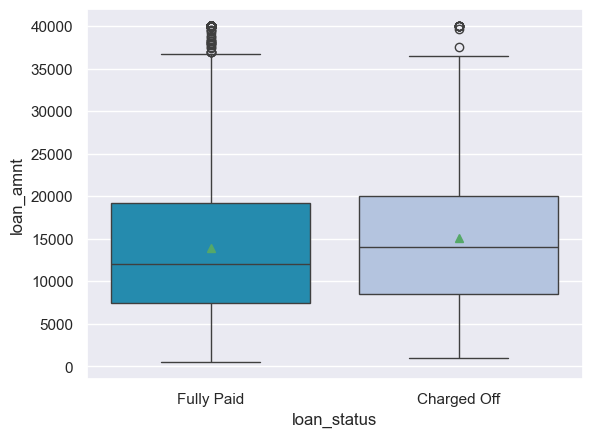

In [15]:
 #t will also detect outliers

sns.boxplot(x='loan_status', y="loan_amnt", data=df, showmeans=True, palette='PuBuGn_r', saturation=5)

In [16]:
# checking mean value of loan approval:

df.groupby("loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


### Observations:
- Line inside the box that is Median line is almost equal for both fully paid and charged off loans.
- based on these we can make assumption that loan amount is not the factor in deciding whether the person will default or     not.
- there are few outlier values

### To check how interset rate affects the target variable we have used boxplot-

<Axes: xlabel='loan_status', ylabel='int_rate'>

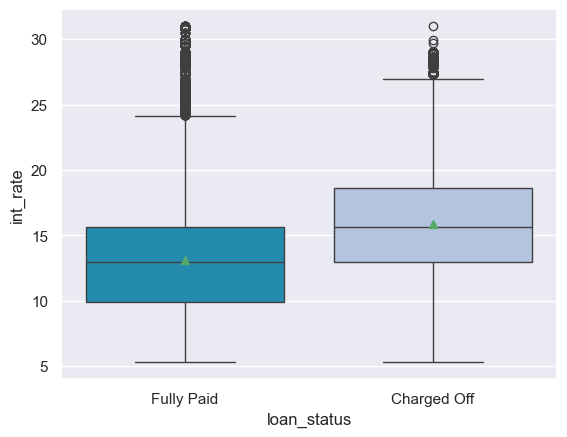

In [17]:
sns.boxplot(x='loan_status', y="int_rate", data=df, showmeans=True, palette='PuBuGn_r', saturation=5)

In [18]:
# summary statistics by loan status:

df.groupby("loan_status")["int_rate"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15.882587,4.388135,5.32,12.99,15.61,18.64,30.99
Fully Paid,318357.0,13.092105,4.319105,5.32,9.91,12.99,15.61,30.99


### Observations:
- Charged-off loans tend to have much higher interest rates
- there are some outlier values

### Interest rate vs Loan amount:
- Interest Rate: Interest Rate on the loan
- Loan amount: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

<Axes: xlabel='int_rate', ylabel='loan_amnt'>

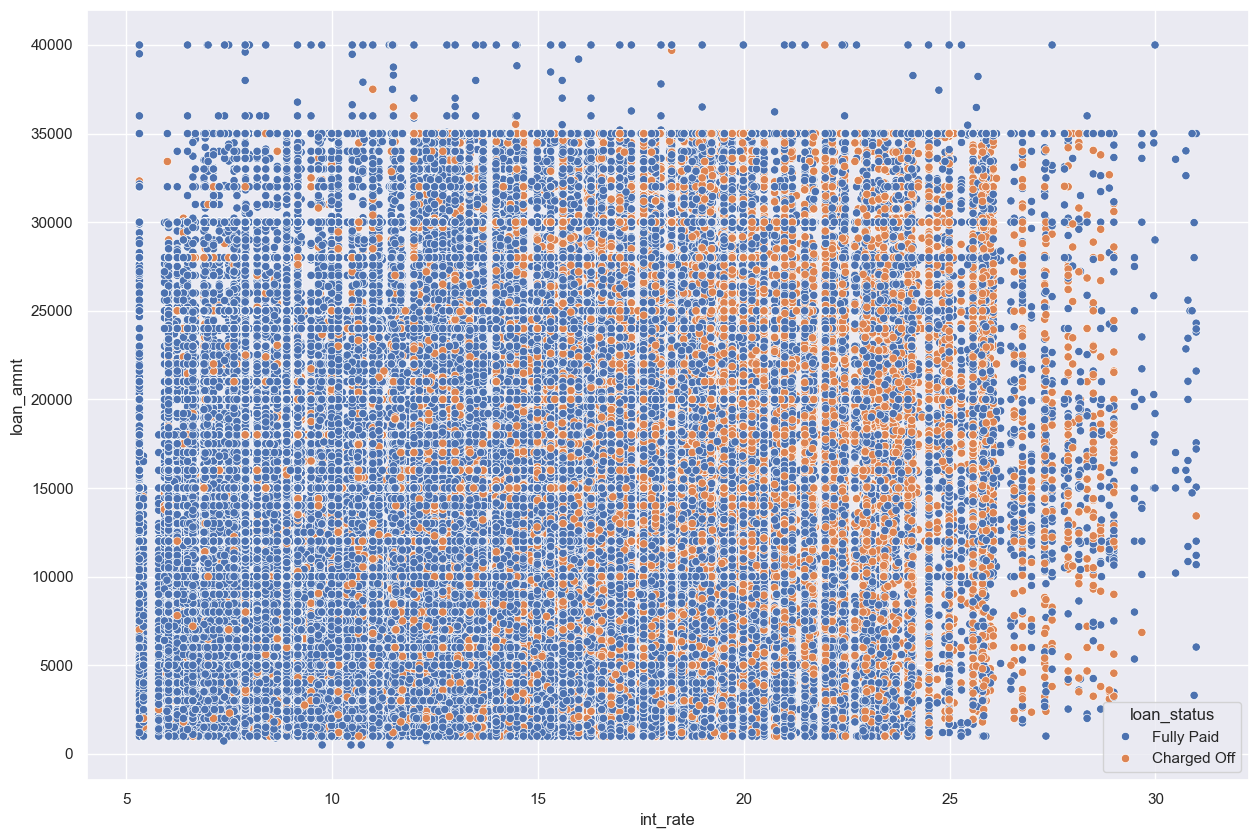

In [19]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='int_rate',y='loan_amnt', data=df, hue='loan_status')

### Observations:
- here we can see that as the interest rate is increasing the no of charged off loans are becoming denser(hight charged off loans as the interset rate increasing)
- but this is not the case in loan amount as we can see by graph.
- It seems that loans with high intersest rate are more likely to be unpaid

## Debt to Income ratio (dti):
- A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [20]:
df['dti'].describe()

count    396030.000000
mean         17.379514
std          18.019092
min           0.000000
25%          11.280000
50%          16.910000
75%          22.980000
max        9999.000000
Name: dti, dtype: float64

<Axes: xlabel='dti', ylabel='loan_status'>

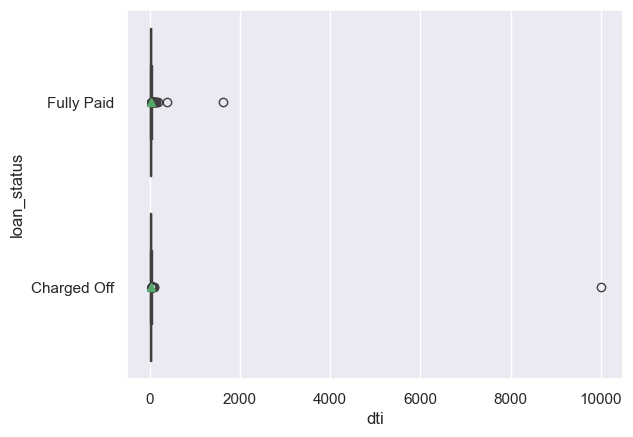

In [21]:
sns.boxplot(y='loan_status', x="dti", data=df, showmeans=True, palette='PuBuGn_r', saturation=5)

In [22]:
df.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,19.656346,36.781068,0.0,13.33,19.34,25.55,9999.0
Fully Paid,318357.0,16.824010,8.500979,0.0,10.87,16.34,22.29,1622.0


### Observation:
- The distribution is extremely skewed.
- Lowest dti ratio is 0
- highest dti ratio is 9999
- There are several outliers, this may be the wroung entry of data.

### Loan Grading -->> df['grade']
- Loan grading is a classification system that involves assigning a quality score to a loan based on a borrower's credit history, quality of the collateral(something pledged as security for repayment of a loan), and the likelihood of repayment of the principal and interest.
- Loan grading is part of a lending institution's loan review or credit risk system and is usually an aspect of the credit underwriting and approval processes.
- The score takes into account not only the borrower's credit score but also a combination of several indicators of credit risk from the credit report and loan application, such as the level of guarantor support, repayment history, cash flow, projected yearly expenses, etc.

In [23]:
df['grade'].unique() # grade given to customer

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

##### so we have understood there are total 7 grades given to the customers.

<Axes: xlabel='grade', ylabel='count'>

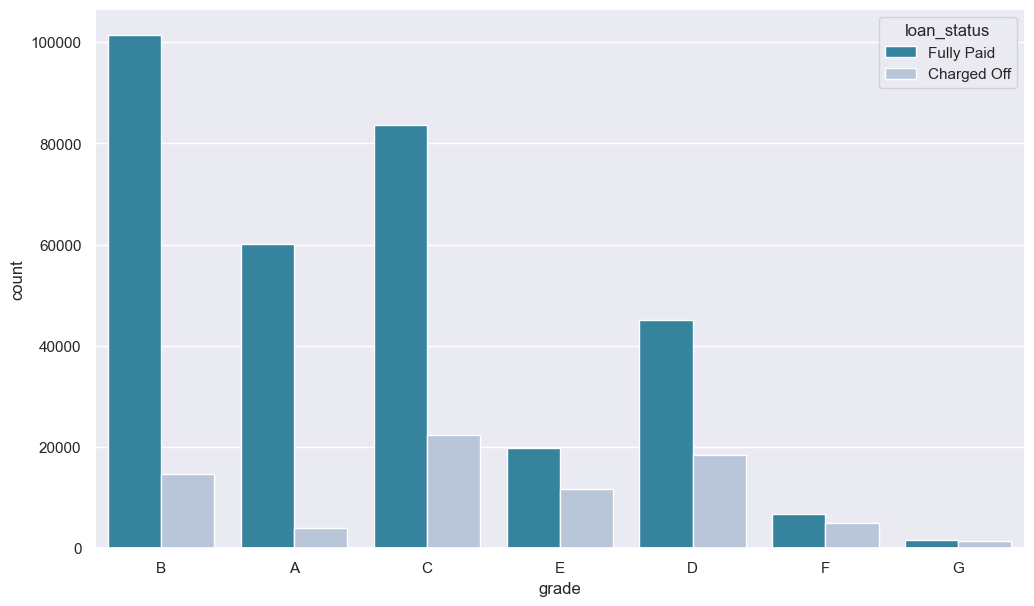

In [24]:
# we will plot grade variable with loan status to know how grading affects the loan-

plt.figure(figsize=(12,7)) # to change the shape of graph
sns.countplot(x='grade', hue='loan_status', data=df,  palette='PuBuGn_r')

In [25]:
# 1st have taken out the rows which have grade as "A" and so on
# we have used groupby based on loan status
# we got one object on which we will call grade variable and count it.
# Changed it into % values.
for grade in sorted(df["grade"].unique()):
    print(f"For grade {grade}:")
    print(df[df['grade']==grade].groupby("loan_status")["grade"].count()*100/len(df[df['grade']==grade]))
    print()

For grade A:
loan_status
Charged Off     6.287878
Fully Paid     93.712122
Name: grade, dtype: float64

For grade B:
loan_status
Charged Off    12.573049
Fully Paid     87.426951
Name: grade, dtype: float64

For grade C:
loan_status
Charged Off    21.1809
Fully Paid     78.8191
Name: grade, dtype: float64

For grade D:
loan_status
Charged Off    28.867829
Fully Paid     71.132171
Name: grade, dtype: float64

For grade E:
loan_status
Charged Off    37.36344
Fully Paid     62.63656
Name: grade, dtype: float64

For grade F:
loan_status
Charged Off    42.787971
Fully Paid     57.212029
Name: grade, dtype: float64

For grade G:
loan_status
Charged Off    47.8389
Fully Paid     52.1611
Name: grade, dtype: float64



### Observations:
- From these we can see as the grade increasing percentage of charged off loans increasing.
- Default rate is incresing as we go from category A onwards.

In [26]:
df["sub_grade"].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [27]:
sub_grade_ordered = sorted(df["sub_grade"])
# odered subgrade variable for better visualizatio

<Axes: ylabel='count'>

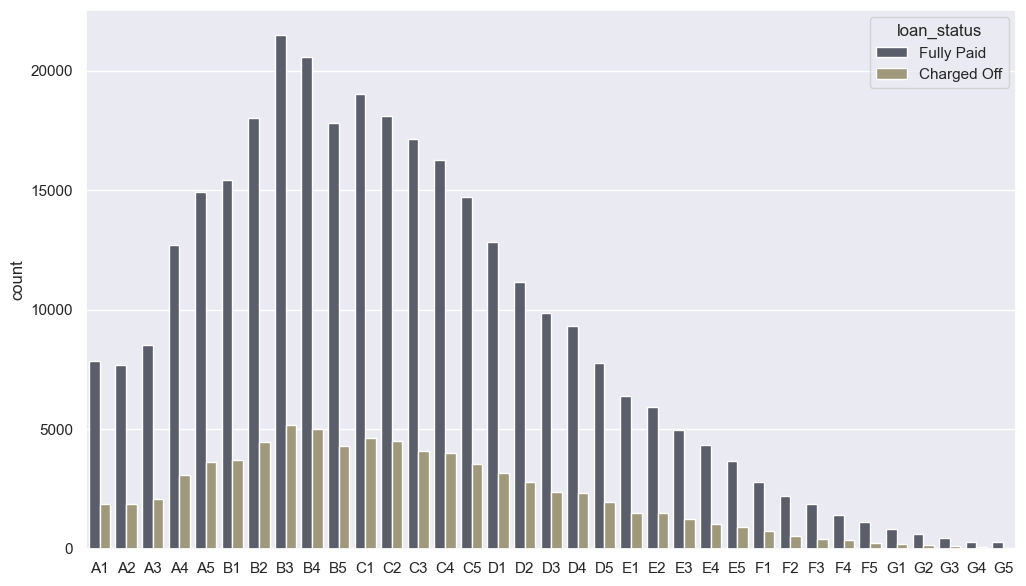

In [28]:
plt.figure(figsize=(12,7)) 
sns.countplot(x=sub_grade_ordered, hue='loan_status', data=df, palette='cividis')

In [29]:
for grade in sorted(df["sub_grade"].unique()):
    print(f"For sub grade {grade}:")
    print(df[df['sub_grade']==grade].groupby("loan_status")["sub_grade"].count()*100/len(df[df['sub_grade']==grade]))
    print()

For sub grade A1:
loan_status
Charged Off     2.867715
Fully Paid     97.132285
Name: sub_grade, dtype: float64

For sub grade A2:
loan_status
Charged Off     4.818647
Fully Paid     95.181353
Name: sub_grade, dtype: float64

For sub grade A3:
loan_status
Charged Off     5.805598
Fully Paid     94.194402
Name: sub_grade, dtype: float64

For sub grade A4:
loan_status
Charged Off     7.023877
Fully Paid     92.976123
Name: sub_grade, dtype: float64

For sub grade A5:
loan_status
Charged Off     8.49077
Fully Paid     91.50923
Name: sub_grade, dtype: float64

For sub grade B1:
loan_status
Charged Off     9.8582
Fully Paid     90.1418
Name: sub_grade, dtype: float64

For sub grade B2:
loan_status
Charged Off    10.8513
Fully Paid     89.1487
Name: sub_grade, dtype: float64

For sub grade B3:
loan_status
Charged Off    12.335397
Fully Paid     87.664603
Name: sub_grade, dtype: float64

For sub grade B4:
loan_status
Charged Off    13.839303
Fully Paid     86.160697
Name: sub_grade, dtype: fl

## Observations:
- E, F and G subgrades has maximum loan defalters.

### we will check how verification status is affecting the loan status-

<Axes: xlabel='verification_status', ylabel='count'>

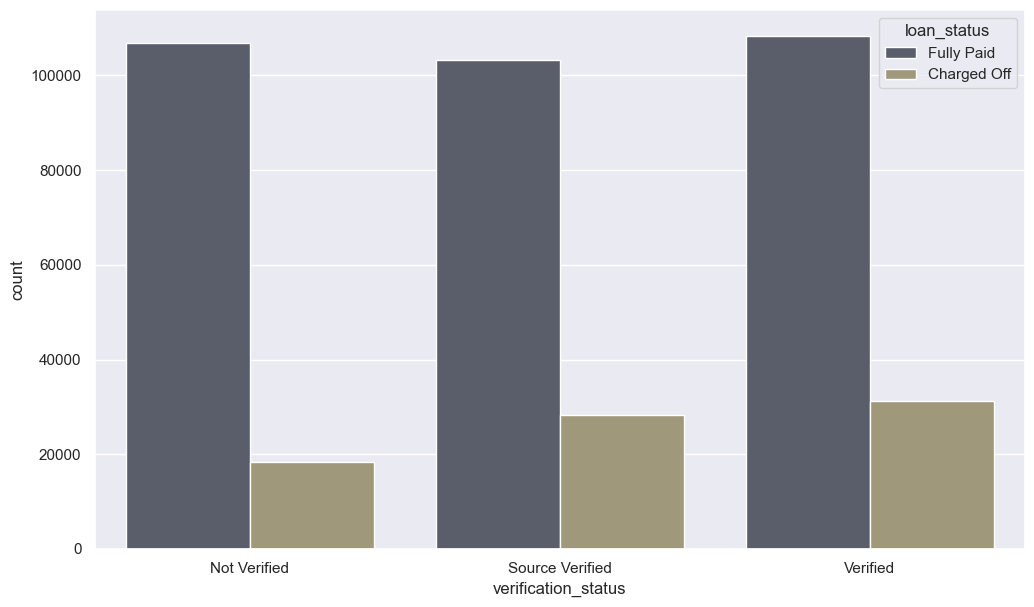

In [30]:
plt.figure(figsize=(12,7))
sns.countplot(x='verification_status', hue='loan_status', data=df, palette='cividis')

In [31]:
for status in df['verification_status'].unique():
    print(f"For {status}:")
    print(df[df["verification_status"]==status].groupby("loan_status")["verification_status"].count()*100/len(df[df["verification_status"]==status]))
    print()

For Not Verified:
loan_status
Charged Off    14.635999
Fully Paid     85.364001
Name: verification_status, dtype: float64

For Source Verified:
loan_status
Charged Off    21.474293
Fully Paid     78.525707
Name: verification_status, dtype: float64

For Verified:
loan_status
Charged Off    22.321102
Fully Paid     77.678898
Name: verification_status, dtype: float64



### Observations:
- Here we can see a trend that more verified people defaulted than the not verified
- distrubution for 'not verified', 'verified' and 'scource verified' is almost similar.
- that means current company varification process is not efficient as it should be.

### application_type:

In [32]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [33]:
df['application_type'].value_counts()

application_type
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64

### title and purpose:

In [34]:
df['title'].nunique()

48817

In [35]:
df['purpose'].nunique()

14

In [36]:
df['purpose'].value_counts()

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64

In [37]:
df.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()

purpose
wedding               0.120861
car                   0.134767
educational           0.163424
major_purchase        0.164733
credit_card           0.167118
home_improvement      0.170079
vacation              0.189233
house                 0.197183
debt_consolidation    0.207414
other                 0.212178
medical               0.217112
renewable_energy      0.234043
moving                0.234758
small_business        0.294510
Name: proportion, dtype: float64

# Observation-
- as we have seen purpose and title both have same kind of information.
- both columns title and purpose refers same information.
- but title has more unique values than purpose.
- 12% of completed loans for weddings have charged-off, but around 30% of completed small business loans have charged-off.

In [38]:
df.drop("title", axis=1, inplace=True)

### emp_title:

In [39]:
df["emp_title"].value_counts()

emp_title
                           22927
Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
                           ...  
Postman                        1
McCarthy & Holthus, LLC        1
jp flooring                    1
Histology Technologist         1
Gracon Services, Inc           1
Name: count, Length: 173106, dtype: int64

In [40]:
df["emp_title"].nunique()

173106

In [41]:
df.drop("emp_title", axis=1, inplace=True)

### emp_length:

In [42]:
df["emp_length"].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       ''], dtype=object)

In [43]:
#creating an ordered list of employes
emp_order = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

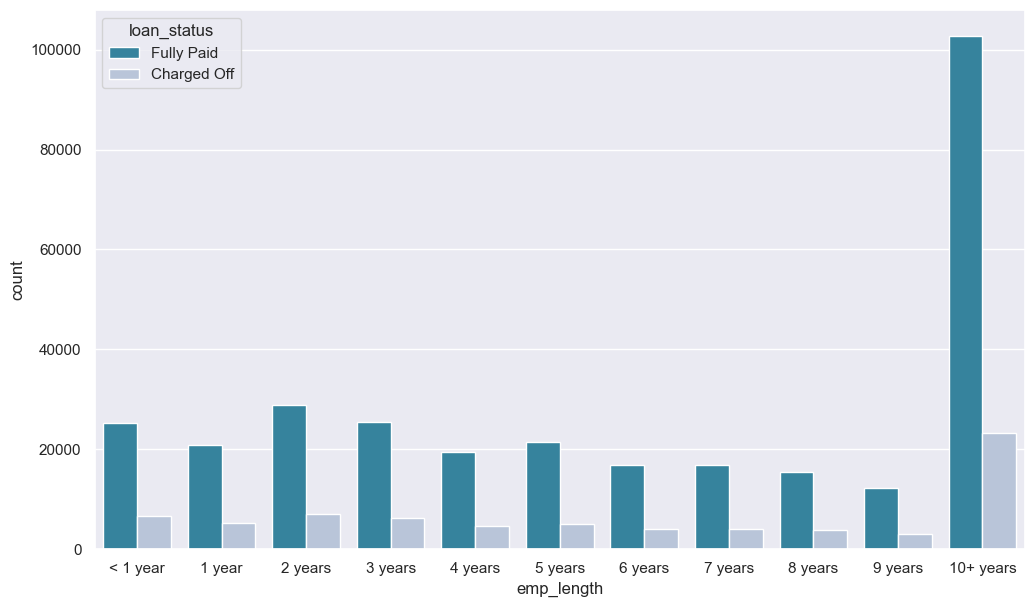

In [44]:
plt.figure(figsize=(12,7))
sns.countplot(x=df['emp_length'], order=emp_order, hue='loan_status', data=df, palette='PuBuGn_r')

In [45]:
for value in emp_order:
    print(f"For grade {value}:")
    print(df[df['emp_length']==value].groupby("loan_status")["emp_length"].count()*100/len(df[df['emp_length']==value]))
    print()

For grade < 1 year:
loan_status
Charged Off    20.687155
Fully Paid     79.312845
Name: emp_length, dtype: float64

For grade 1 year:
loan_status
Charged Off    19.913453
Fully Paid     80.086547
Name: emp_length, dtype: float64

For grade 2 years:
loan_status
Charged Off    19.326206
Fully Paid     80.673794
Name: emp_length, dtype: float64

For grade 3 years:
loan_status
Charged Off    19.523133
Fully Paid     80.476867
Name: emp_length, dtype: float64

For grade 4 years:
loan_status
Charged Off    19.238477
Fully Paid     80.761523
Name: emp_length, dtype: float64

For grade 5 years:
loan_status
Charged Off    19.218721
Fully Paid     80.781279
Name: emp_length, dtype: float64

For grade 6 years:
loan_status
Charged Off    18.919438
Fully Paid     81.080562
Name: emp_length, dtype: float64

For grade 7 years:
loan_status
Charged Off    19.4774
Fully Paid     80.5226
Name: emp_length, dtype: float64

For grade 8 years:
loan_status
Charged Off    19.976002
Fully Paid     80.023998
Nam

### Observations:
- The majority of people who took loan has 10 + years of experience
- But the Distribution is somewhat uniform across all the employee length.
- Here this is not a very deciding factor whether someone will charged off or not.

In [46]:
df.drop("emp_length", axis=1, inplace=True)

### mort_acc

In [47]:
df["mort_acc"].count()

396030

In [48]:
#mortage accounts count
df["mort_acc"].value_counts()

mort_acc
0.0     177572
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

### pub_rec:

In [49]:
df['pub_rec'].value_counts()

pub_rec
0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: count, dtype: int64

In [50]:
# we have considered 0 as a as good customer
# rest all as a bad customer.
df['pub_rec']=df['pub_rec'].apply(lambda x : 0 if x==0 else 1 )

df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].apply(lambda x : 0 if x==0 else 1 )

In [51]:
df['pub_rec'].value_counts()

pub_rec
0    338272
1     57758
Name: count, dtype: int64

In [52]:
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0    350915
1     45115
Name: count, dtype: int64

### home_ownership:

In [53]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [54]:
# here NONE and ANY categories have very less count of values so we have added that values into the OTHER category-

df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'], 'OTHER')

In [55]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

<Axes: ylabel='count'>

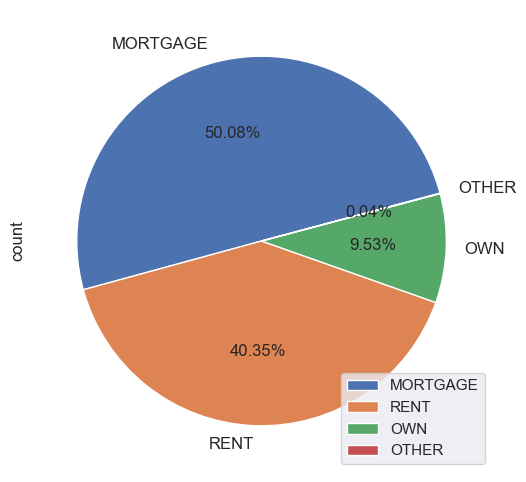

In [56]:
df['home_ownership'].value_counts().plot(kind='pie',legend=True, startangle=15, fontsize=12, figsize=(14,6),autopct='%1.2f%%')

In [57]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

### Handling Categorical Variables:

In [58]:
df.select_dtypes("object").columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### loan_status:

In [59]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [60]:
df['loan_status']=df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

### initial_list_status:

In [61]:
df['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [62]:
df['initial_list_status']=df['initial_list_status'].map({'w':0,'f':1})

In [63]:
df['initial_list_status'].unique()

array([0, 1], dtype=int64)

### term:

In [64]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [65]:
for value in df['term'].unique():
    print(f"For {value}:")
    print(df[df['term']==value].groupby("loan_status")["term"].count()*100/len(df[df['term']==value]))
    print()

For  36 months:
loan_status
0    15.774573
1    84.225427
Name: term, dtype: float64

For  60 months:
loan_status
0    31.941505
1    68.058495
Name: term, dtype: float64



### address:

In [66]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 396030, dtype: object

In [67]:
df['address'].nunique()

393700

In [68]:
df['postal_code'] = df['address'].apply(lambda x: x[-5:])

In [69]:
# as we have seen address column has 392898 unique values in it so it will create
# it will create a problem of curse of dimensionality.
# so we have extracted only the zipcode from the address and used it-

df.drop("address", axis=1, inplace=True)

In [70]:
df['postal_code'].nunique()

10

In [71]:
df['postal_code'].unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

### earliest_cr_line:

In [72]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 396030, dtype: object

In [73]:
#earliesr cr line extracting the year only
df["earliest_cr_line"]=df["earliest_cr_line"].apply(lambda x:int(x[-4:]))

In [74]:
df['earliest_cr_line'].unique()

array([1990, 2004, 2007, 2006, 1999, 2005, 1994, 1997, 1984, 1995, 2001,
       1982, 1996, 2000, 2003, 2008, 1998, 2002, 2009, 1992, 1988, 2010,
       1986, 2012, 1978, 1993, 1983, 1989, 1991, 2011, 1980, 1981, 1987,
       1985, 1967, 1972, 1969, 1979, 1965, 1977, 1974, 1976, 1975, 1971,
       2013, 1964, 1970, 1973, 1963, 1960, 1966, 1961, 1968, 1958, 1955,
       1953, 1959, 1962, 1944, 1956, 1951, 1957, 1950, 1954, 1948],
      dtype=int64)

# issue_date:
- The month which the loan was funded.
- we're only using variables available to investors before the loan was funded.
- issue_d will not be included in the final model.

In [75]:
#dropping issue date as the loan defaulter will not be dependent on issue date.
df.drop("issue_d",axis=1,inplace=True)

### grade:

In [76]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [77]:
sorted_grades = sorted(df['grade'].unique())

In [78]:
ordinals = [x for x in range(1,df['grade'].nunique()+1)]

In [79]:
grade_map = dict(zip(sorted_grades,ordinals))
grade_map

{'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}

In [80]:
df['grade'] = df['grade'].map(grade_map)
df['grade'].unique()

array([2, 1, 3, 5, 4, 6, 7], dtype=int64)

In [81]:
# As grade and subgrade is expressing similar kind of information so dropping subgrade colomn-
df.drop('sub_grade', inplace=True, axis=1)

### Outliers removal:

In [82]:
df.shape

(396030, 22)

In [83]:
max_threshold = df['loan_amnt'].quantile(0.99)
min_threshold = df['loan_amnt'].quantile(0.01)
df = df[(df['loan_amnt']<max_threshold) & (df['loan_amnt']>min_threshold)]
df.shape

(376951, 22)

In [84]:
max_threshold = df['int_rate'].quantile(0.99)
min_threshold = df['int_rate'].quantile(0.01)
df = df[(df['int_rate']<max_threshold) & (df['int_rate']>min_threshold)]
df.shape

(368308, 22)

In [85]:
max_threshold = df['dti'].quantile(0.99)
min_threshold = df['dti'].quantile(0.01)
df = df[(df['dti']<max_threshold) & (df['dti']>min_threshold)]
df.shape

(360912, 22)

In [86]:
max_threshold = df['installment'].quantile(0.99)
min_threshold = df['installment'].quantile(0.01)
df = df[(df['installment']<max_threshold) & (df['installment']>min_threshold)]
df.shape

(353692, 22)

In [87]:
# df.to_csv("visualization.csv")

### Labal encoding:

In [88]:
df.select_dtypes(['object']).columns

Index(['term', 'home_ownership', 'verification_status', 'purpose',
       'application_type', 'postal_code'],
      dtype='object')

In [89]:
df['postal_code'].unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '93700', '86630'], dtype=object)

In [90]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [91]:
from sklearn.preprocessing import LabelEncoder
def label_encoding(data,var):
    encoder = LabelEncoder()
    data[var] = encoder.fit_transform(data[var])

In [92]:
cols = df.select_dtypes(['object']).columns

for var in cols:
    label_encoding(df,var)

In [93]:
df['postal_code'].unique()

array([3, 1, 0, 2, 5, 7, 4, 6, 9, 8])

In [94]:
df['home_ownership'].unique()

array([3, 0, 2, 1])

### correlations:

<Axes: >

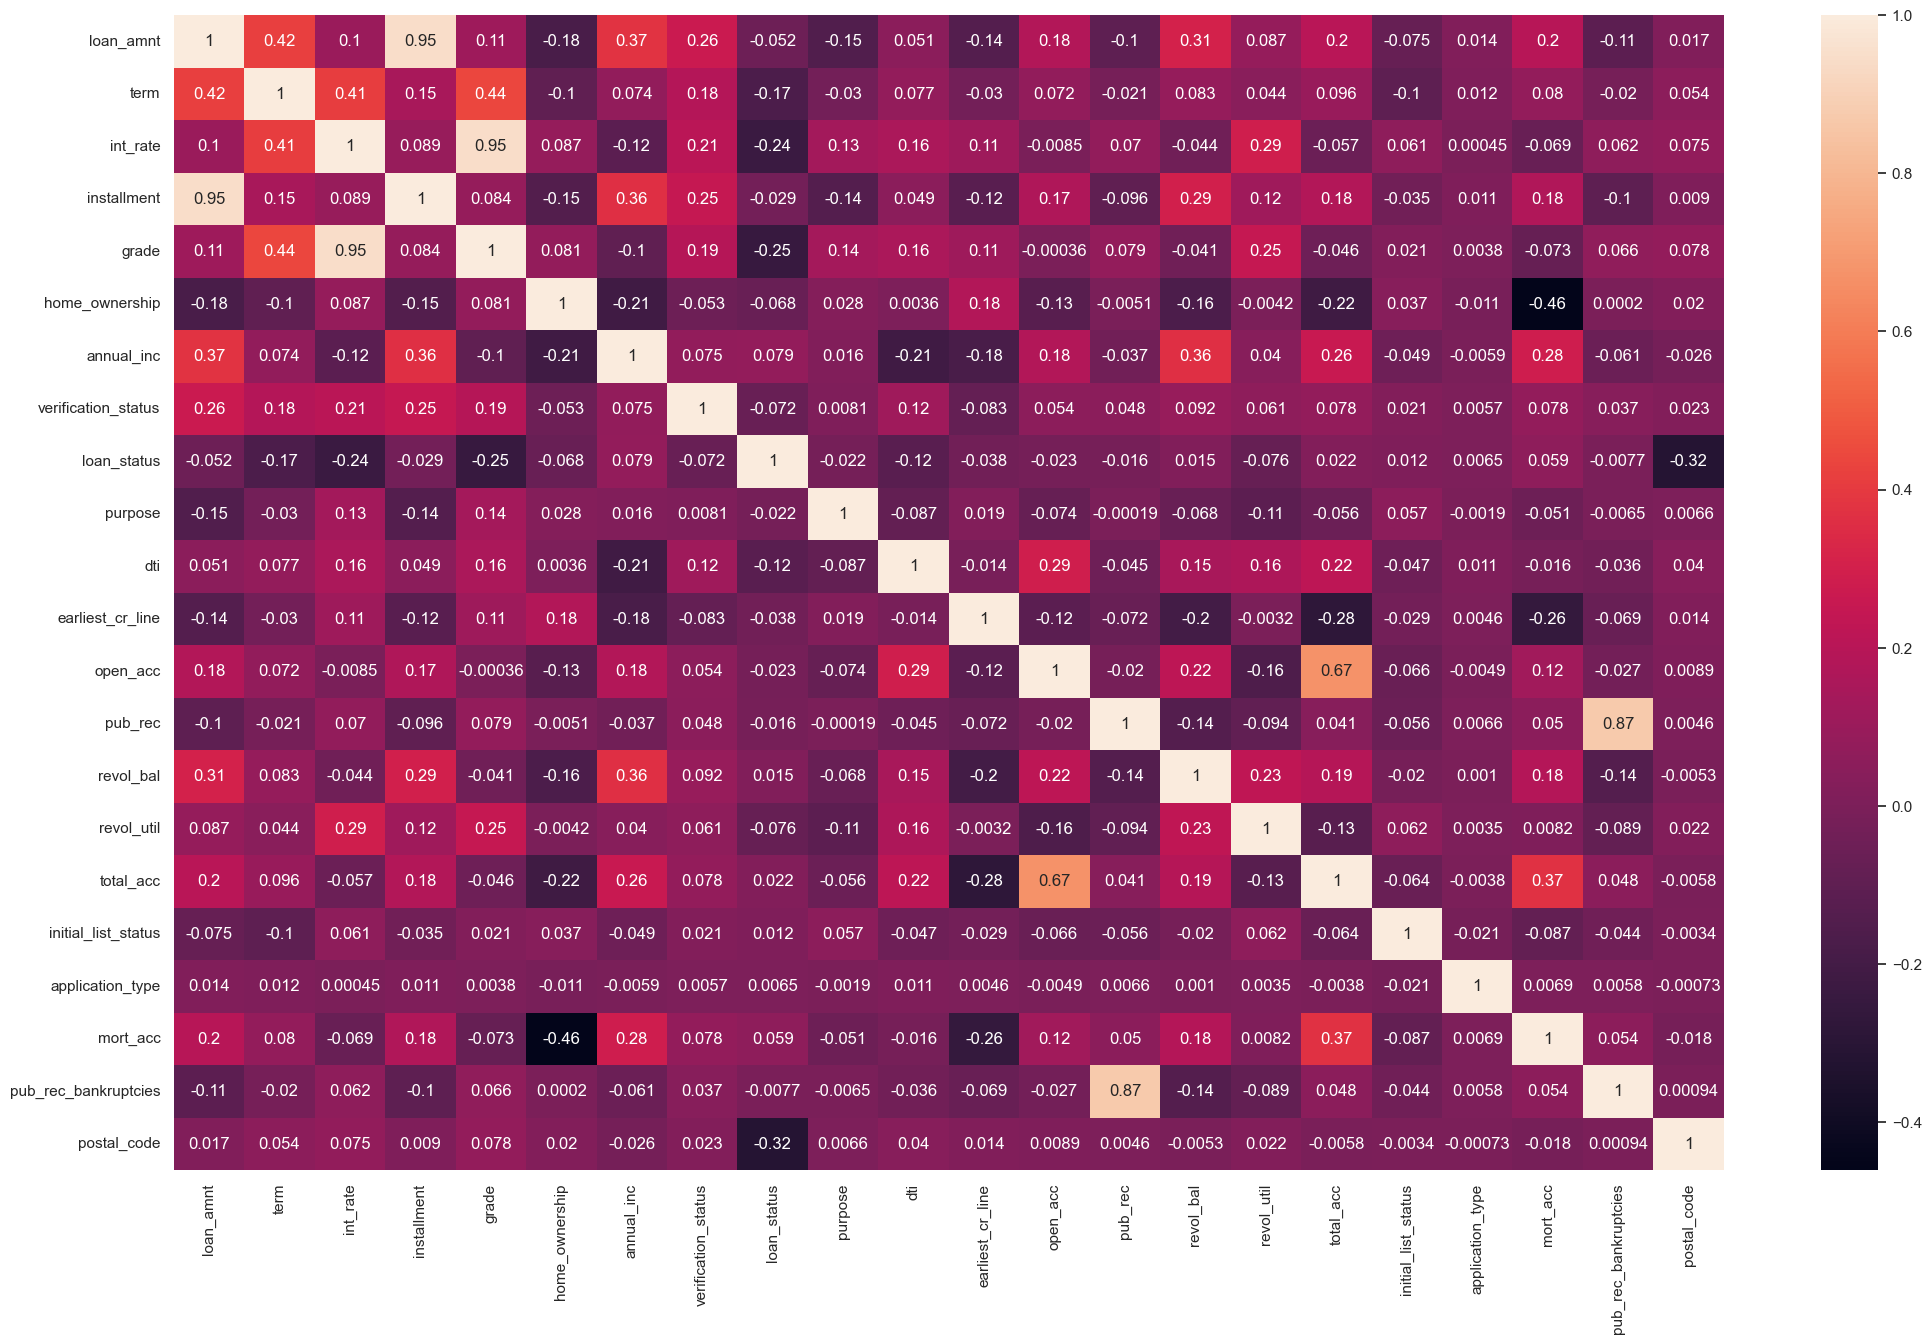

In [95]:
plt.figure(figsize=(25,15))
corelation = df.corr()
sns.heatmap(data=corelation, annot=True)

In [96]:
# These columns dropped due to above correlations-

df.drop(['initial_list_status','pub_rec_bankruptcies','application_type','open_acc'],axis =1,inplace =True)

In [97]:
df

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,earliest_cr_line,pub_rec,revol_bal,revol_util,total_acc,mort_acc,postal_code
0,10000.0,0,11.44,329.48,2,3,117000.0,0,1,12,26.24,1990,0,36369.0,41.8,25.0,0.0,3
1,8000.0,0,11.99,265.68,2,0,65000.0,0,1,2,22.05,2004,0,20131.0,53.3,27.0,3.0,1
2,15600.0,0,10.49,506.97,2,3,43057.0,1,1,1,12.79,2007,0,11987.0,92.2,26.0,0.0,1
3,7200.0,0,6.49,220.65,1,3,54000.0,0,1,1,2.60,2006,0,5472.0,21.5,13.0,0.0,0
4,24375.0,1,17.27,609.33,3,0,55000.0,2,0,1,33.95,1999,0,24584.0,69.8,43.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,0,13.11,202.49,2,3,64000.0,0,1,2,10.81,1991,0,11456.0,97.1,9.0,0.0,1
396025,10000.0,1,10.99,217.38,2,3,40000.0,1,1,2,15.63,2004,0,1990.0,34.3,23.0,0.0,5
396026,21000.0,0,12.29,700.42,3,0,110000.0,1,1,2,21.45,2006,0,43263.0,95.7,8.0,1.0,1
396027,5000.0,0,9.99,161.32,2,3,56500.0,2,1,2,17.56,1997,0,32704.0,66.9,23.0,0.0,7


### Creating dependent and independent variables:

In [98]:
#df.to_csv('Complete_dataset.csv', index=False)

In [99]:
x=df.drop("loan_status",axis=1)
y=df["loan_status"]

In [100]:
x.shape, y.shape

((353692, 17), (353692,))

## SMOTE (Synthetic Minority Over-sampling Technique):
- SMOTE is a valuable tool in machine learning when dealing with imbalanced datasets, helping to create more robust and fair models.

In [101]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.3)
x_res, y_res = smote.fit_resample(x,y)

x_res.shape, y_res.shape

((371283, 17), (371283,))

In [102]:
x_res

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,purpose,dti,earliest_cr_line,pub_rec,revol_bal,revol_util,total_acc,mort_acc,postal_code
0,10000.000000,0,11.440000,329.480000,2,3,117000.000000,0,12,26.240000,1990,0,36369.000000,41.800000,25.000000,0.000000,3
1,8000.000000,0,11.990000,265.680000,2,0,65000.000000,0,2,22.050000,2004,0,20131.000000,53.300000,27.000000,3.000000,1
2,15600.000000,0,10.490000,506.970000,2,3,43057.000000,1,1,12.790000,2007,0,11987.000000,92.200000,26.000000,0.000000,1
3,7200.000000,0,6.490000,220.650000,1,3,54000.000000,0,1,2.600000,2006,0,5472.000000,21.500000,13.000000,0.000000,0
4,24375.000000,1,17.270000,609.330000,3,0,55000.000000,2,1,33.950000,1999,0,24584.000000,69.800000,43.000000,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371278,3883.069400,0,11.164021,127.297364,2,2,20718.106157,0,6,23.027236,1982,0,12310.227112,58.402400,17.141714,0.000000,4
371279,5989.511437,0,17.062269,214.116001,3,2,50000.000000,0,4,23.806910,2007,0,5476.069021,49.797171,19.706862,0.000000,5
371280,27705.480682,0,15.887258,797.065126,3,1,72000.000000,2,2,14.602575,1997,0,10453.133157,59.451968,27.465768,3.178077,5
371281,12000.000000,0,9.785939,369.883918,1,3,45000.000000,0,1,16.616455,2003,0,13868.725515,52.498104,11.374868,0.000000,2


## Feature selection method:

In [103]:
from sklearn.feature_selection import mutual_info_classif

# determining the mutual information
mutual_info= mutual_info_classif(x_res,y_res)
mutual_info

array([0.04644581, 0.01606709, 0.10084269, 0.04085754, 0.04087164,
       0.03954907, 0.01122114, 0.02364816, 0.01776604, 0.05286165,
       0.00388488, 0.00382582, 0.01923263, 0.06756859, 0.07158582,
       0.05343379, 0.21471473])

In [104]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_res.columns
mutual_info.sort_values(ascending=False)

# here info.sort values return numpy value and not an array so convertin
# X_train and Y_train into dataframes to get x_train.columns function

postal_code            0.214715
int_rate               0.100843
total_acc              0.071586
revol_util             0.067569
mort_acc               0.053434
dti                    0.052862
loan_amnt              0.046446
grade                  0.040872
installment            0.040858
home_ownership         0.039549
verification_status    0.023648
revol_bal              0.019233
purpose                0.017766
term                   0.016067
annual_inc             0.011221
earliest_cr_line       0.003885
pub_rec                0.003826
dtype: float64

<Axes: >

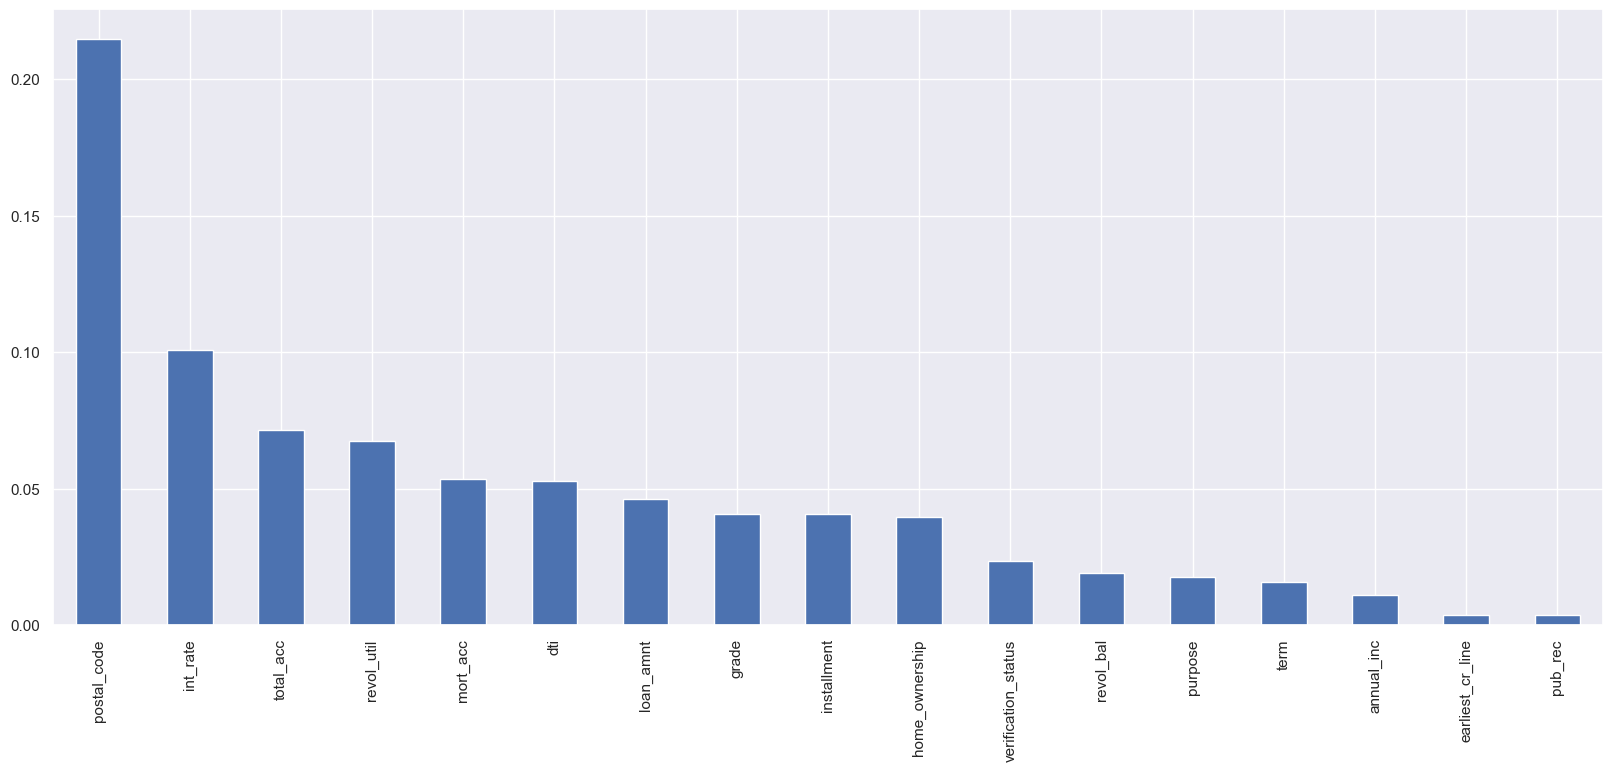

In [105]:
# poting the graph as per values of mutual info per feature
mutual_info.sort_values(ascending= False).plot.bar(figsize=(20,8))

In [106]:
#x_res.drop(['earliest_cr_line','pub_rec', 'verification_status','annual_inc','purpose'],axis=1,inplace= True)

### Train Test Split:

In [107]:
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=123456)

<Axes: >

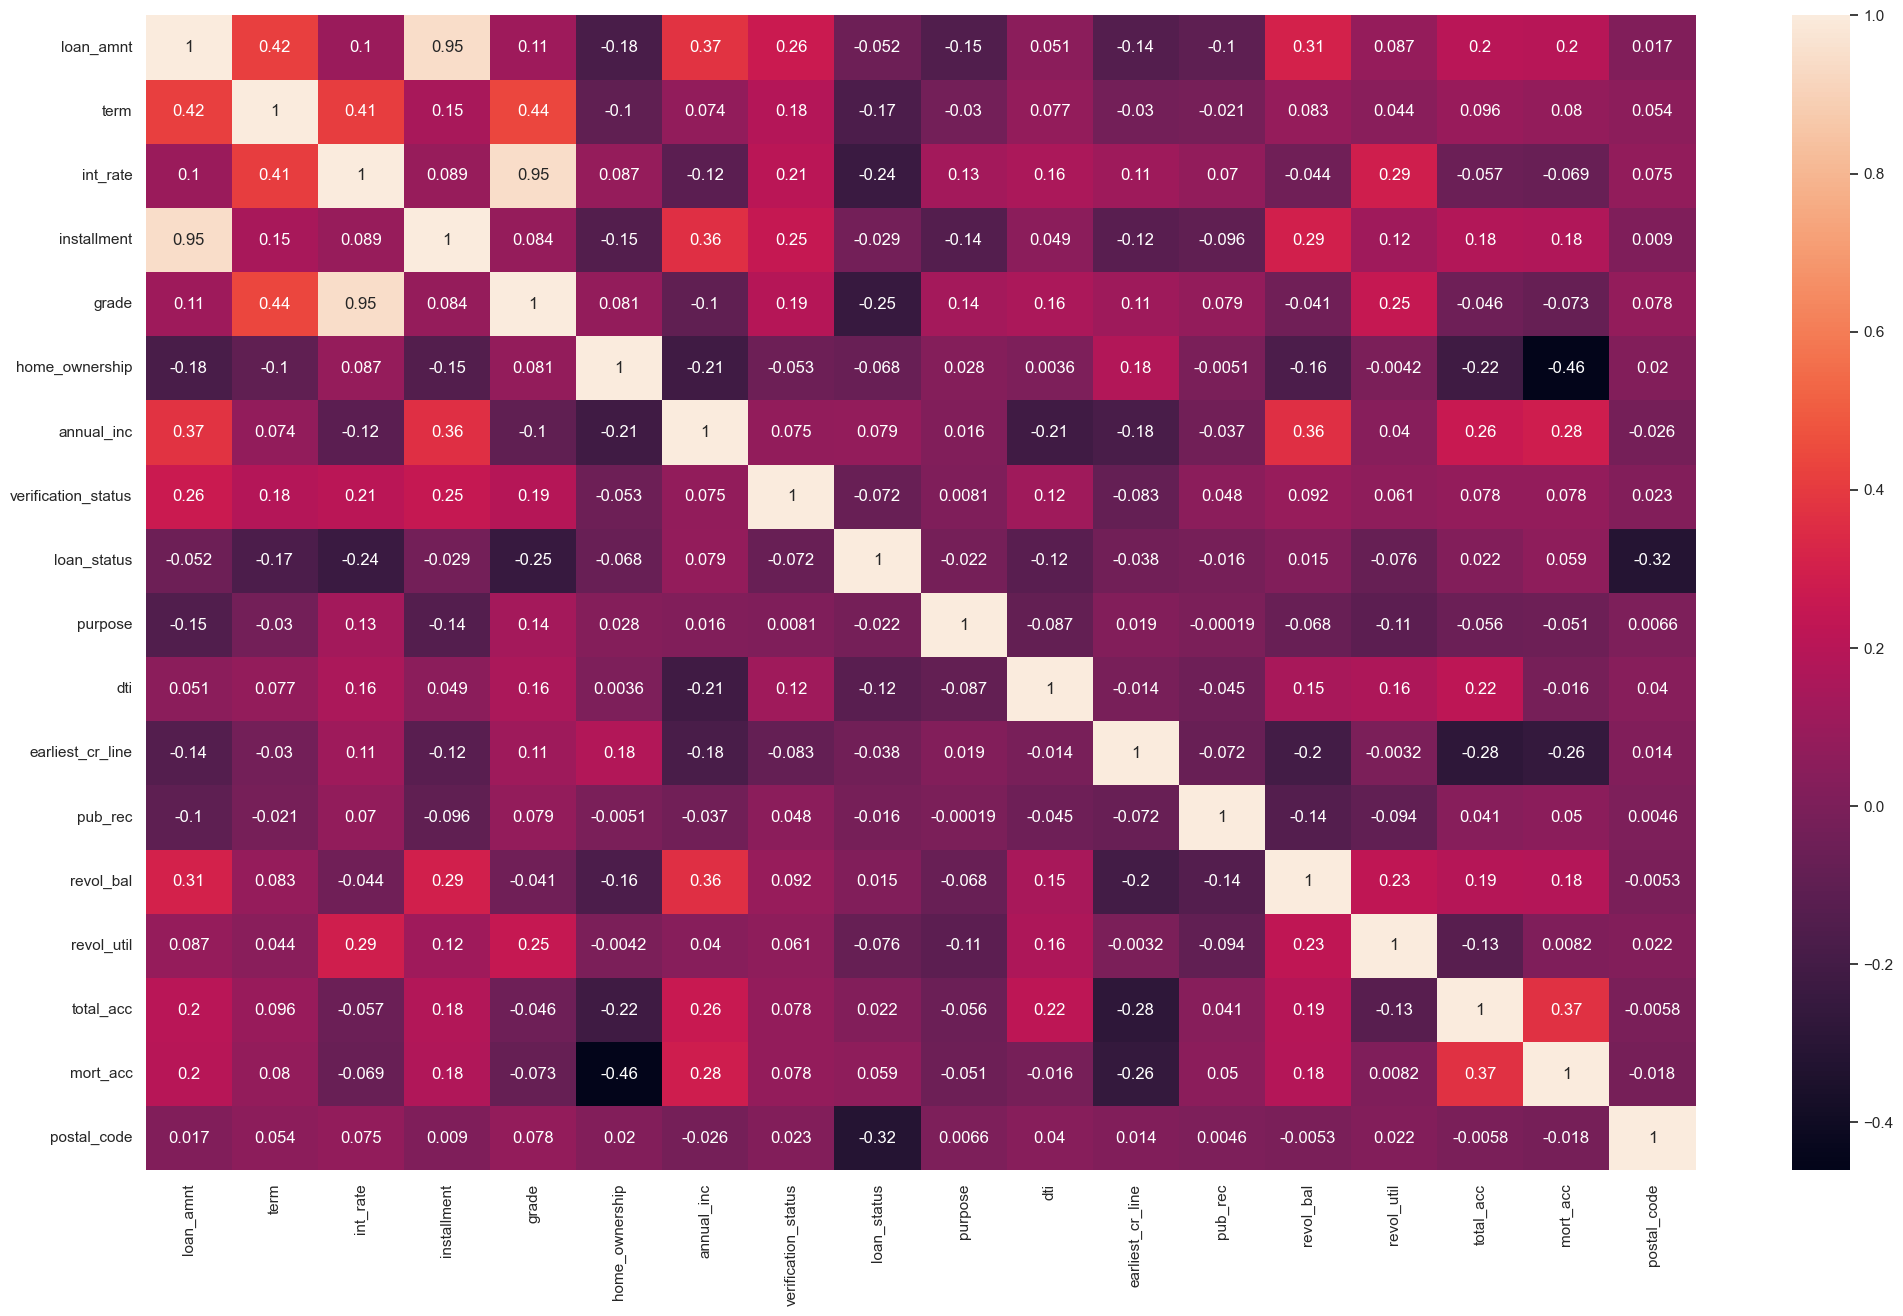

In [108]:
plt.figure(figsize=(25,15))

sns.heatmap(data=df.corr(), annot=True)

## Creating the Model:

In [109]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xg = XGBClassifier(use_label_encoder=False)
xg.fit(X_train,y_train)
y_pred = xg.predict(x_test)

In [113]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")

              precision    recall  f1-score   support

           0       0.94      0.55      0.69     17244
           1       0.88      0.99      0.93     57013

    accuracy                           0.89     74257
   macro avg       0.91      0.77      0.81     74257
weighted avg       0.89      0.89      0.88     74257

Accuracy Score: 88.72%


In [ ]:
final_model = xg

## Saving Model : 

In [ ]:
# import pickle
# with open('./bestmodelxgboost.pkl', 'wb') as file:
#     pickle.dump(final_model, file)

In [ ]:
# import joblib

# joblib.dump(final_model,'bestmodexgboost.joblib')